# **Logistic Regression Model**

This is a implementation of Logistic Regression model which is a machine learning algorithm based on supervised learning to predict whether a applicant's gets admitted into a university.

## Problem Statement

Suppose that I am the administrator of a university department and I want to determine each applicant’s chance of admission based on their results on two exams. 
* I have historical data from previous applicant's that I can use as a training set for logistic regression. 
* For each training example, I have the applicant’s scores on two exams and the admissions decision. 
* Goal is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. 

>The source of the dataset comes from [Supervised Machine Learning by Andrew Ng, Coursera](https://www.coursera.org/learn/machine-learning)


##Prepare Tools and Materials

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df = pd.read_csv('/exam_Score.txt')

x_train = np.array(df[['exam 1','exam 2']])
y_train = np.array(df['pass'])
df.head()

,exam 1,exam 2,pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


`x_train` contains exam scores on two exams for a applicant's
  - `y_train` is the admission decision 
      - `y_train = 1` if the applicant was admitted 
      - `y_train = 0` if the applicant was not admitted 
  - Both `X_train` and `y_train` are numpy arrays.

In [2]:
print('First 5 row of x_train:\n',x_train[:5])
print();
print('First 5 row of y_train:\n',y_train[:5])

First 5 row of x_train:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]

First 5 row of y_train:
 [0 0 0 1 1]


## Visualize dataset
- `admitted` contain all exam score of admitted applicant's and it's shown as **green** in the graph
- `rejected` contain all exam score of rejected applicant's and it's shown as **red** in the graph

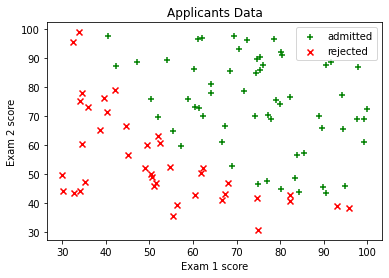

In [3]:
admitted = df[df['pass'] == 1]
rejected = df[df['pass'] == 0]

plt.scatter(admitted['exam 1'],admitted['exam 2'],c = 'g', label = 'admitted' , marker = '+')
plt.scatter(rejected['exam 1'],rejected['exam 2'],c = 'r', label = 'rejected' , marker = 'x')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Applicants Data')
plt.legend()
plt.show()

In [4]:
print(f'Shape x train : {x_train.shape}')
print(f'Shape y train : {y_train.shape}')
print(f'We have {len(y_train)} training data from dataset')

Shape x train : (100, 2)
Shape y train : (100,)
We have 100 training data from dataset


In [5]:
# Set data length
m, n = x_train.shape

## Build the model

### Logistic Regression
For logistic regression, the model is represented as
$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b) \tag{1}$$

where function $g$ is the sigmoid function. The sigmoid function is defined as:
$$g(z) = \frac{1}{1+e^{-z}} \tag{2}$$

The `sigmoid` function to calculate sigmoid equation(2)

In [6]:
def sigmoid(z):
    g = 1 / (1 + (math.e)**(-1*z))
    return g 

### Cost function for logistic regression

For logistic regression, the cost function is represented as

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{3}$$

where:
* m is the number of training examples in the dataset

* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, where:

$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{4}$$
        
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.

* $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b$

<br /> 

`count_cost` function implementing equation (3) and (4) to calculate total cost


In [7]:
def count_cost(x, y, w, b) :
  total_cost = 0
  for i in range(m):
    z_wb = np.dot(w,x[i]) + b
    f_wb = sigmoid(z_wb)

    loss = ((-1 * y[i]) * math.log(f_wb) - (1-y[i]) * math.log(1 - f_wb))
    total_cost = total_cost + loss
  
  total_cost = total_cost/m

  return total_cost

### Gradient for logistic regression

In this section, there will be implementation of the gradient for logistic regression.

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where:

$$\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{6}$$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{7}$$


Note that parameters $b$ and $w_j$ are all updated simultaneously

<br></br>

`gradient` function implementing equation (6) and (7) to calculate gradient descent algorithm

In [8]:
def gradient(x,y,w,b,*argv):
  dj_db = 0. 
  dj_dw = np.zeros(n)

  for i in range(m):
    z_wb = np.dot(w,x[i]) + b
    f_wb = sigmoid(z_wb)
    err_i = f_wb - y[i]

    # dj db
    dj_db = dj_db + err_i

    # dj dw
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err_i * x[i][j]

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_db, dj_dw

## Intiate the Model

Here is a brief explanation the logic of `compute_model` function that ultilize all fuctions:
- $w$ , and $b$ value will be intiated at random value
- $alpha$ is the learning rate of the algorithm
- equation (5) implemented in function below to update $w$ , and $b$ value to produce the lowest cost
- `list_` will stores all counted cost of every  $w$ , and $b$ value for graph visualization

In [9]:
def compute_model(x,y,w,b,list_,iters,alpha):
  for i in range(iters):
    cost = count_cost(x_train, y_train, w, b)
    list_.append(cost)

    b_update,w_update = gradient(x,y,w,b)
    b = b - (alpha*b_update)
    for j in range(n):
      w[j] = w[j] - (alpha*w_update[j])
    
  return w,b

### Run the function
- counted cost will be stored in `cost_list`
- alpha set to 0.001
- program will iters for number of `iters`

In [17]:
cost_list = []
w = 0.01 * (np.random.rand(2) - 0.5)
b = -8
alpha = 0.001
iters = 10000

w,b = compute_model(x_train,y_train,w,b,cost_list,iters,alpha)
print(f'Final w value is: {w}\nFinal b value is: {b}\n')
print(f'Total cost for correspondents w and b is: {count_cost(x_train,y_train,w,b)}')

Final w value is: [0.07125349 0.06482881]
Final b value is: -8.188615085400823

Total cost for correspondents w and b is: 0.30186821266597186


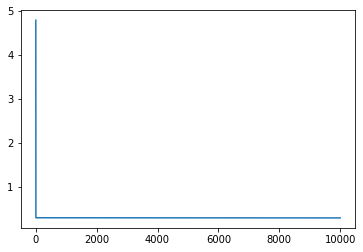

In [18]:
plt.plot(cost_list)

## Visualize the model
After w and b value is found, let's visualize the decision boundary to actual dataset

In [22]:
# Define a grid of points that span the range of input data
x1_min, x1_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
x2_min, x2_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
grid = np.c_[xx1.ravel(), xx2.ravel()]

# Plot the linear decision boundary
z = np.dot(grid, w) + b
z = z.reshape(xx1.shape)

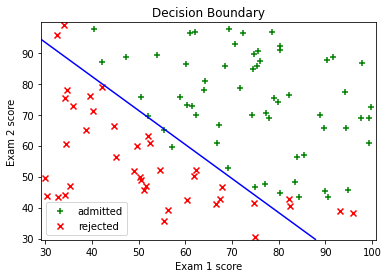

In [24]:
admitted = df[df['pass'] == 1]
rejected = df[df['pass'] == 0]

plt.scatter(admitted['exam 1'],admitted['exam 2'],c = 'g', label = 'admitted' , marker = '+')
plt.scatter(rejected['exam 1'],rejected['exam 2'],c = 'r', label = 'rejected' , marker = 'x')
plt.contour(xx1, xx2, z, levels=[0], colors='b')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Decision Boundary')
plt.legend()
plt.show()
print()




> We can see that the decision boundary fit pretty wall to the actual data

## Check the Accuracy

To check the accuracy of learned parameter vector $w$ and $b$, we need to get a final prediction ($y^{(i)}=0$ or $y^{(i)}=1$) from the logistic regression model, with equation below:

  if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$ &rarr; **admitted** $\tag{8}$
  
  if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$ &rarr; **rejected** $\tag{9}$
<br></br>
The program will compare the predictions (`p`) with the actual $y$ (`y_train`) from the data set and calculate the percentage of correct predictions

In [21]:
true,false=0,0
for i in range(m):   
        z_wb = np.dot(w,x_train[i]) + b
        f_wb = sigmoid(z_wb)
    
        if f_wb >= 0.5:
          p = 1
        elif f_wb < 0.5:
          p = 0
        
        if y_train[i] == p:
          true +=1
        else:
          false +=1

print(f'Number of tests = {true+false}\nCorrect Predictions = {true}\nWrong Predictions = {false}')
print(f'\nAccuracy = {true * 100 / (true+false)}%')

Number of tests = 100
Correct Predictions = 92
Wrong Predictions = 8

Accuracy = 92.0%


## Test the Model

Now we can use the model with new data input to predict whether applicant is admitted or rejected based on equation (8) and (9)

`predict` function will be use to make the prediction

In [14]:
def predict(w,b,x1,x2):
  x = np.array([x1,x2])
  z_wb = np.dot(w,x) + b
  f_wb = sigmoid(z_wb)
  return f_wb

In [25]:
exam_1_score = 60 #@param {type:"slider", min:0, max:100, step:1}
exam_2_score = 65 #@param {type:"slider", min:0, max:100, step:1}
fx = predict(w,b,exam_1_score,exam_2_score)

if fx >= 0.5:
  print(f'With score:\nExam 1 = {exam_1_score}\nExam 2 = {exam_2_score}')
  print()
  print('Applicant is admitted!')
else:
  print(f'With score:\nExam 1 = {exam_1_score}\nExam 2 = {exam_2_score}')
  print()
  print('Applicant is rejected!')

print(f'\nf(x) value is = {round(fx,3)}')

With score:
Exam 1 = 60
Exam 2 = 65

Applicant is admitted!

f(x) value is = 0.575
